In [14]:
# Import numpy and pandas for Processing Arrays and Dataset,matplotlib and seaborn for Visualization
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
data=pd.read_csv('D:\\Projects\\Notebooks\\DatasetJourney\\Datasets\\headbrain.csv') #Read the CSV Dataset into a pandas Dataframe

In [16]:
print(data.shape) # Print Dataset Shape

(237, 4)


In [17]:
data.head() # Print First 5 rows of the Dataframe

,Gender,AgeCat,HeadSize,BrainWeight
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [18]:
data.info() # Dataset Information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Gender       237 non-null    int64
 1   AgeCat       237 non-null    int64
 2   HeadSize     237 non-null    int64
 3   BrainWeight  237 non-null    int64
dtypes: int64(4)
memory usage: 7.5 KB


In [19]:
data.describe() #Statistical Information on the Dataset

,Gender,AgeCat,HeadSize,BrainWeight
count,237.000000,237.000000,237.000000,237.000000
mean,1.434599,1.535865,3633.991561,1282.873418
std,0.496753,0.499768,365.261422,120.340446
min,1.000000,1.000000,2720.000000,955.000000
25%,1.000000,1.000000,3389.000000,1207.000000
50%,1.000000,2.000000,3614.000000,1280.000000
75%,2.000000,2.000000,3876.000000,1350.000000
max,2.000000,2.000000,4747.000000,1635.000000


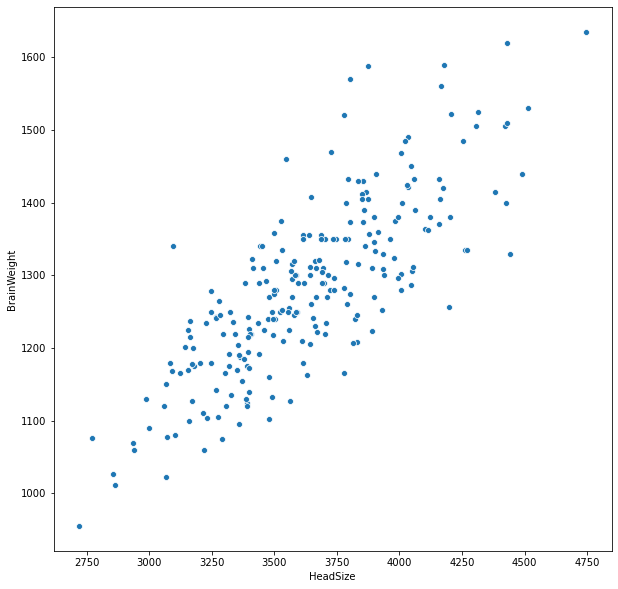

In [22]:
# Plot the Dataset (Head Size vs Brain Weight)
plt.figure(figsize=(10,10))
sns.scatterplot(y='BrainWeight',x='HeadSize',data=data)
plt.show()

In [23]:
# Create function for calculating mean, variance and covariance
def mean(values):
    return sum(values) / float(len(values))

def covariance(x, mean_x, y, mean_y):
    covar = 0.0
    for i in range(len(x)):
        covar += (x[i] - mean_x) * (y[i] - mean_y)
    return covar

def variance(values, mean):
    return sum([(x-mean)**2 for x in values])

In [25]:
# Next is to calculate coefficients for each Input Attribute
def coefficients(dataset):
    x = [row[0] for row in dataset]
    y = [row[1] for row in dataset]
    x_mean, y_mean = mean(x), mean(y)
    b1 = covariance(x, x_mean, y, y_mean) / variance(x, x_mean)
    b0 = y_mean - b1 * x_mean
    return [b0, b1]

In [26]:
# Create the Linear Regression Model Function
def simple_linear_regression(train, test):
    predictions = list()
    b0, b1 = coefficients(train)
    for row in test:
        yhat = b0 + b1 * row[0]
        predictions.append(yhat)
    return predictions

In [28]:
# Get the X and y values from the Dataframe
X=data["HeadSize"]
y=data["BrainWeight"]

In [29]:
# Create the dataset with [X,y] pairs
dataset=[]
for i in range(data.shape[0]):
    dataset.append([X[i],y[i]])

In [33]:
# Create function for train test split
def train_test_split(dataset,ratio):
    length=len(dataset)
    split_val=length*ratio
    train_length=length-int(split_val)
    train=dataset[0:train_length]
    test=dataset[train_length:]
    return train,test

In [34]:
train,test=train_test_split(dataset,0.2) #Split the dataset into Train and Test

In [38]:
predictions=simple_linear_regression(train,test) # Fit the linear regression model on the dataset

In [40]:
for i in range(len(test)):
    print("Test Brain Weight Value: "+str(test[i][1])+" Predicted Value: "+str(predictions[i]))

Test Brain Weight Value: 1237 Predicted Value: 1170.4559410738702
Test Brain Weight Value: 1204 Predicted Value: 1217.6342009987711
Test Brain Weight Value: 1090 Predicted Value: 1129.2685712981634
Test Brain Weight Value: 1355 Predicted Value: 1300.7578018188347
Test Brain Weight Value: 1250 Predicted Value: 1268.057526421152
Test Brain Weight Value: 1076 Predicted Value: 1072.6047353037056
Test Brain Weight Value: 1120 Predicted Value: 1143.7465558253816
Test Brain Weight Value: 1220 Predicted Value: 1215.1379967699404
Test Brain Weight Value: 1240 Predicted Value: 1252.3314397795184
Test Brain Weight Value: 1220 Predicted Value: 1203.405836894436
Test Brain Weight Value: 1095 Predicted Value: 1219.1319235360697
Test Brain Weight Value: 1235 Predicted Value: 1186.1820277155039
Test Brain Weight Value: 1105 Predicted Value: 1198.4134284367747
Test Brain Weight Value: 1405 Predicted Value: 1341.6955511716587
Test Brain Weight Value: 1150 Predicted Value: 1145.993139631329
Test Brain We

In [55]:
# Create the function for RMSE Evaluation Metric
from math import sqrt
def rmse_metric(actual, predicted):
    sum_error = 0.0
    for i in range(len(actual)):
        prediction_error = predicted[i] - actual[i]
        sum_error += (prediction_error ** 2)
    mean_error = sum_error / float(len(actual))
    return sqrt(mean_error)

In [56]:
actual=[]
for i in range(len(test)):
    actual.append(test[i][1])

In [57]:
rmse=rmse_metric(actual,predictions)

In [59]:
print(" RMSE on Test Set: "+str(rmse))

 RMSE on Test Set: 62.690552763366675
